In [10]:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import math
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 12.1 Least Squares Problem

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


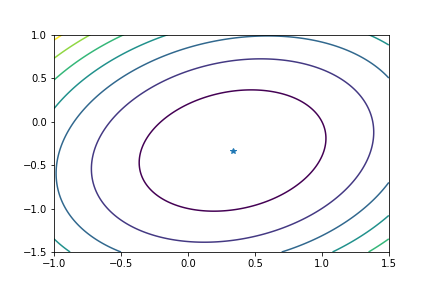

<IPython.core.display.Javascript object>


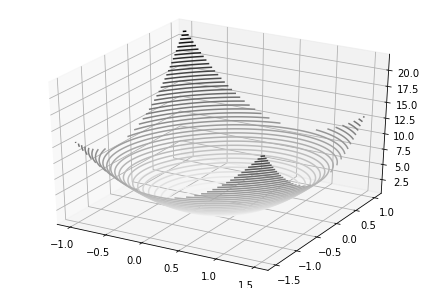

In [14]:
%matplotlib inline  
%matplotlib notebook
%pylab
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
def calculateFunction(x1,x2):
    return (2*x1 - 1)**2 + (-x1 + x2)**2 + (2*x2 + 1)**2
A = np.array([[2,0],[-1,1],[0,2]])
b = np.array([[1], [0], [-1]])
x1 = np.linspace(-1., 1.5, 1000)
x2 = np.linspace(-1.5, 1., 1000)
X,Y = np.meshgrid(x1,x2)
f_x = calculateFunction(X,Y)
plt.contour(X,Y,f_x)
plt.plot(1/3, -1/3, '*')
# Plot 3d figure
fig = plt.figure()
ax = Axes3D(fig)
ax.contour3D(X, Y, f_x, 50, cmap='binary')

In [12]:
A,b = np.matrix([[2,0],[-1,1],[0,2]]), np.array([1,0,-1])
xhat = np.array([1/3,-1/3])
rhat = np.matmul(A,xhat) - b
npl.norm(rhat)
x = np.array([1/2,-1/2])
r = np.matmul(A,x) - b
npl.norm(r)
rhat

0.81649658092772603

1.0

matrix([[-0.33333333, -0.66666667,  0.33333333]])

# 12.2 Solution

In [13]:
np.matmul(npl.inv(A.transpose()*A)*A.transpose(),b)  
np.matmul(npl.pinv(A),b)
np.matmul(np.matmul(A.transpose(),A),xhat) - np.matmul(A.transpose(),b)

matrix([[ 0.33333333, -0.33333333]])

matrix([[ 0.33333333, -0.33333333]])

RuntimeError: Iterator automatic output has an array subtype which changed the dimensions of the output

In [ ]:
z = np.array([-1.1,2.3])
# np.shape(np.matmul(A,z))
# np.shape(rhat)
np.matmul(A,z) @ rhat.transpose() #J: (A*z)'*rhat; auto columning in Julia means we have to reverse the transpose order 

# 12.3 Solving Least Squares Problems

In [ ]:
A,b = np.random.randn(100,20),np.random.randn(100)

In [ ]:
x1 = npl.lstsq(A,b)[0] #lstsq gives the solution, residuals and rank, need to choose [0], 
                       #in Julia the backslash operator auto uses lstsq based on if given matrix is overdetermined 
x2 = np.matmul(npl.inv(np.matmul(A.transpose(),A)),np.matmul(A.transpose(),b))
x3 = np.matmul(npl.pinv(A),b)
Q,R = npl.qr(A)
x4 = npl.solve(R,(np.matmul(Q.transpose(),b)))

npl.norm(x1-x2)  
npl.norm(x2-x3)
npl.norm(x3-x4)

In [ ]:
np.shape(A)

In [ ]:
x1

#### Complexity: 
1. doubling m doubles compute time
2. doubling n quadruples compute time

In [ ]:
m,n = 2000, 500
A,b = np.random.randn(m,n), np.random.randn(m)
%timeit npl.lstsq(A,b)

In [ ]:
m,n = 4000, 500
A,b = np.random.randn(m,n), np.random.randn(m)
%timeit npl.lstsq(A,b)

In [ ]:
m,n = 2000, 1000
A,b = np.random.randn(m,n), np.random.randn(m)
%timeit npl.lstsq(A,b)

In [ ]:
A,B = np.random.randn(1000,100), np.random.randn(1000,10)
X = npl.lstsq(A,B)[0]
x3 = npl.lstsq(A,B[:,3])[0]
npl.norm(X[:,3]-x3)

# 12.4 Examples 

In [ ]:
#advertising budget
R = np.matrix([[.97,1.86,.41],[1.23,2.18,.53],[.8,1.24,.62],[1.29,.98,.51],[1.1,1.23,.69],[.67,.34,.54],[.87,.26,.62],[1.1,.16,.48],[1.92,.22,.71],[1.29,.12,.62]])
m,n = np.shape(R)
vdes = 1e3 * np.ones(m)
s = npl.lstsq(R,vdes)[0]
s
#will be continued in 16 re: how to add a constraint like a total budget 

In [ ]:
rms = lambda x: np.sqrt(np.mean(np.square(x))) #not a built in numpy function
rms(np.matmul(R,s) - vdes)

In [ ]:
#10 lamps each with an x,y position and a height above the floor
#goal: adjust light intensity for each lamp to get uniform lighting at the floor level
lamps = np.matrix([[4.1,20.4,4],[14.1,21.3,3.5],[22.6,17.1,6],[5.5,12.3,4.0],[12.2,9.7,4.0],[15.3,13.8,6],[21.3,10.5,5.5],[3.9,3.3,5.0],[13.1,4.3,5.0],[20.3,4.2,4.5]])
n = np.shape(lamps)[0]
N = int(max(np.ravel(lamps))+2.4) #grid size
m = N*N #pixel density
n,m

In [ ]:
#an m x 2 matrix with coordinates of pixel centers 
pixels = np.hstack((np.vstack([np.vstack(np.arange(.5,N,1)) for i in range(N)]),np.vstack([np.vstack(np.full(N,.5+i)) for i in range(N)])))
A = np.zeros((m,n))

In [ ]:
for i in range(m):
    for j in range(n):
        A[i,j] = 1.0/np.square(npl.norm(np.hstack([pixels[i,:],[0]]) - lamps[j,:]))
A = m/sum(A) * A
x = npl.lstsq(A,np.ones((m,1)))[0]
rmsLS = rms(np.matmul(A,x) - 1)

rms(np.matmul(A,np.ones((n,1))) - 1)

In [ ]:
plt.hist(np.matmul(A,x)) 

In [ ]:
plt.hist(np.matmul(A,np.ones((n,1))))

<IPython.core.display.Javascript object>


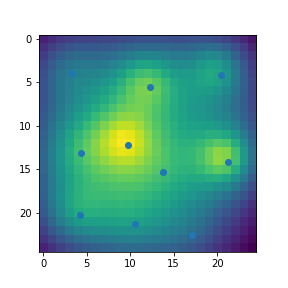

<IPython.core.display.Javascript object>


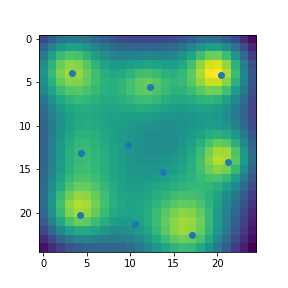

Optimal lamp powers to have 1 value for every pixel is = 
 [ 1.46211018  0.78797433  2.96641047  0.74358042  0.08317333  0.21263945
  0.21218408  2.05114815  0.90760315  1.47222464]


In [15]:
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
# number of lamps
n = 10
# x, y positions of lamps and height above floor
lamps = np.array([[4.1 ,20.4, 4],[14.1, 21.3, 3.5],[22.6, 17.1,6], 
                  [5.5 ,12.3, 4.0], [12.2, 9.7, 4.0], [15.3, 13.8, 6],
                  [21.3, 10.5, 5.5], [3.9 ,3.3, 5.0], [13.1, 4.3, 5.0], 
                  [20.3,4.2, 4.5]])
N = 25 # grid size
m = N*N # number of pixels
# construct m x 2 matrix with coordinates of pixel centers
pixels = np.hstack([np.outer(np.arange(0.5,N,1),
np.ones(N)).reshape(m,1), np.outer(np.ones(N),
np.arange(0.5,N,1)).reshape(m,1)])
# The m x n matrix A maps lamp powers to pixel intensities.
# A[i,j] is inversely proportional to the squared distance of
# lamp j to pixel i.
A = np.zeros((m,n))
for i in range(m):
    for j in range(n):
        A[i,j] = 1.0 / (np.linalg.norm(np.hstack([pixels[i,:], 0])- lamps[j,:])**2)
A = (m/np.sum(A)) * A # scale elements of A
# Plot the intensities of each pixel as a grid
# TODO Figure out a way to blend these images.
lResultIn1 = np.matmul(A, np.ones(n))
fig = plt.figure(figsize=(4., 4.))
plt.imshow(lResultIn1.reshape(25, 25))
plt.scatter(lamps[:, 1], lamps[:, 0])
# Solve the least squares problem
lampPowers = np.linalg.lstsq(A, np.ones(m))
# Plot the optimally lit room
lResultOptimal = A @ np.asarray(lampPowers[0])
fig = plt.figure(figsize=(4., 4.))
plt.imshow(lResultOptimal.reshape(25, 25))
plt.scatter(lamps[:, 1], lamps[:, 0])
print("Optimal lamp powers to have 1 value for every pixel is = \n", lampPowers[0])